## Preliminary Data Processing

In this initial step, we load the dataset `XYZloan_default_selected_vars.csv` we previously used from homework 3. Loading the dataset into a pandas DataFrame allows us to inspect its structure, ensuring that all variables are correctly formatted and ready for further exploration and modeling.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
path = '/home/ritwikgoel/Downloads/XYZloan_default_selected_vars.csv'
df = pd.read_csv(path)

df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0', 'id'])

# Check the first few rows to understand the dataset
df.head()


,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,1,31,2,1,12,2017/7/6 10:21,ios,3,3,1,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,0,27,1,1,12,2017/4/6 12:51,h5,5,4,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,0,33,1,4,12,2017/7/1 14:11,h5,4,2,0,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,0,34,2,4,12,2017/7/7 10:10,android,5,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,0,47,2,1,12,2017/7/6 14:37,h5,4,4,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


### Exploratory Data Analysis - Data Structure and Summary Statistics

To begin our analysis, we examine the overall structure and characteristics of the dataset.

we assess the data types of each variable and verify that there are no missing values. This inspection is crucial to identify any potential issues with data types that may impact modeling later on.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0] # Shows columns with missing values


TD022    19598
TD023     7663
TD024     3694
TD025     2550
TD026     1846
TD027     1697
TD028     1636
TD029     1630
TD044    79997
TD048    79999
TD051    79995
TD054    79988
TD055    79999
TD061    79990
TD062    79999
PA022      381
PA023      381
PA028      381
PA029      381
PA030      381
PA031      381
CD008      381
CD018      381
CD071      381
CD072      381
CD088      381
CD100      381
CD101      381
CD106      381
CD107      381
CD108      381
CD113      381
CD114      381
CD115      381
CD117      381
CD118      381
CD120      381
CD121      381
CD123      381
CD130      381
CD131      381
CD132      381
CD133      381
CD135      381
CD136      381
CD137      381
CD152      381
CD153      381
CD160      381
CD162      381
CD164      381
CD166      381
CD167      381
CD169      381
CD170      381
CD172      381
CD173      381
MB005     2793
dtype: int64

In [3]:
# Drop the specified columns from the dataframe
columns_to_remove = ['TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'AP005']
df = df.drop(columns=columns_to_remove)

In [4]:
# Check the unique values of the columns (first 39)
df.nunique().head(39)

loan_default        2
AP001              37
AP002               2
AP003               5
AP004               4
AP006               4
AP007               5
AP008               5
AP009               2
TD001              21
TD002              12
TD005              25
TD006              21
TD009              39
TD010              30
TD013              46
TD014              34
TD015               8
TD022               5
TD023              11
TD024              16
TD025               1
TD026               1
TD027               1
TD028               1
TD029               1
CR004               4
CR005               6
CR009           25883
CR012               1
CR015               5
CR017               8
CR018               9
CR019              12
PA022             172
PA023             167
PA028            5142
PA029            4120
PA030            2579
dtype: int64

In [5]:
# Check the unique values of the columns (last 39)
df.nunique().tail(39)

PA031     4323
CD008    31165
CD018     2026
CD071      513
CD072      507
CD088      648
CD100      488
CD101      317
CD106      625
CD107      433
CD108      392
CD113       62
CD114       92
CD115      456
CD117      326
CD118      675
CD120      498
CD121      846
CD123      604
CD130      619
CD131      612
CD132      662
CD133      642
CD135      806
CD136      810
CD137      867
CD152    30592
CD153    30507
CD160      255
CD162      366
CD164      314
CD166     5759
CD167     5415
CD169     8565
CD170     8046
CD172    10818
CD173    10198
MB005       29
MB007      112
dtype: int64

In [6]:
# Drop the specified columns from the dataframe based on the only having 1 unique value
df = df.drop(columns=['CR012','TD025','TD026','TD027','TD028','TD029'])

In [7]:
# Define threshold for unique values
threshold = 1000

# Separate the target variable
target = 'loan_default'
Y = df[target]  # Save the target column
df = df.drop(columns=[target])  # Drop the target column from the DataFrame

# Identify categorical variables based on unique value count
categorical_cols = []
for col in df.columns:
    if df[col].nunique() <= threshold and not col.startswith('CD'):
        categorical_cols.append(col)

# Include text-based variables (dtype=object) in the categorical columns
categorical_cols.extend([col for col in df.select_dtypes(include=['object']).columns if col not in categorical_cols])

# Identify continuous variables based on exclusions
numerical_cols = [col for col in df.columns if col not in categorical_cols or col.startswith('CD')]

# Add the target variable back to the DataFrame
df[target] = Y

# Display the results
print(f"Categorical variables ({len(categorical_cols)}): {categorical_cols}")
print(f"Continuous variables ({len(numerical_cols)}): {numerical_cols}")

# Convert identified categorical variables to the 'category' dtype
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify data types after conversion
print("\nData types after conversion:")
print(df.dtypes)


Categorical variables (30): ['AP001', 'AP002', 'AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024', 'CR004', 'CR005', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'MB005', 'MB007']
Continuous variables (41): ['CR009', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173']

Data types after conversion:
AP001           category
AP002           category
AP003           category
AP004           category
AP006           category
                  ...   
CD172            float64
CD173            float64
MB005           category
MB007           category
loan_default       int64

### Enhanced Data Cleaning: Binning Numerical-Like Categorical Columns

To enhance the data cleaning from the previous assignment, we dynamically bin numerical-like categorical columns into meaningful ranges. This reduces noise, simplifies representation, and improves interpretability.

Key enhancements:
- Special negative values (`-99`, `-98`) are treated as separate categories to retain their significance.
- Dynamic binning divides values based on distribution, with bins labeled by their ranges (e.g., `[0 - 10)`).

This preprocessing ensures the data is clean, consistent, and ready for modeling.


In [8]:
# Set thresholds for high-cardinality and low-cardinality columns
high_cardinality_threshold = 100

# Define negative values to handle
negative_values = [-99, -98]

# Handle null values in categorical columns
for col in df.select_dtypes(include='category').columns:
    # Replace NaN values with the string 'null'
    if 'null' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('null')
    df[col] = df[col].fillna('null')

    # Add negative values as their own categories
    for value in negative_values:
        if f"Special_{value}" not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories([f"Special_{value}"])
        df[col] = df[col].replace(value, f"Special_{value}")

# Identify numerical-like categorical columns
numerical_like_categorical_cols = []
for col in df.select_dtypes(include='category').columns:
    # Check if the column contains only numeric values (ignoring NaNs)
    if df[col].dropna().apply(lambda x: str(x).isdigit()).all():
        numerical_like_categorical_cols.append(col)

# Split columns based on unique values (categorical high- and low-cardinality)
high_cardinality_cols = [
    col for col in numerical_like_categorical_cols if df[col].nunique() > high_cardinality_threshold
]
low_cardinality_cols = [
    col for col in numerical_like_categorical_cols if df[col].nunique() <= high_cardinality_threshold
]

# Process low-cardinality categorical columns (convert to categories)
for col in low_cardinality_cols:
    df[col] = pd.Categorical(df[col])

# Process high-cardinality columns (apply binning and handle negative values)
for col in high_cardinality_cols:
    # Convert to numeric type and replace negative values temporarily with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].replace(negative_values, np.nan)
    
    # Apply qcut for binning (excluding NaNs)
    binned_data, bins = pd.qcut(
        df[col].dropna(), 
        q=100, 
        duplicates="drop", 
        retbins=True
    )
    
    # Create bin labels based on range
    bin_labels = [
        f"[{int(bins[i])} - {int(bins[i+1])})" if i < len(bins) - 2 else f"[{int(bins[i])} - {int(bins[i+1])}]"
        for i in range(len(bins) - 1)
    ]
    
    # Replace column values with bin labels
    df[col] = pd.cut(df[col], bins=bins, labels=bin_labels, include_lowest=True)
    
    # Reintroduce negative values as their own categories
    for value in negative_values:
        if f"Special_{value}" not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories([f"Special_{value}"])
        df[col] = df[col].fillna(f"Special_{value}", inplace=True)

# Handle null values and negative values in numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    # Replace negative values with NaN temporarily
    df[col] = df[col].replace(negative_values, np.nan)
    
    # Impute NaN values with the mean
    df[col].fillna(df[col].mean(), inplace=True)

# Final handling for negative values in numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    # Replace NaN and negative values with the column's median
    median_value = df.loc[~df[col].isin(negative_values), col].median()
    df[col] = df[col].fillna(median_value)

# Check the updated DataFrame
print("Low Cardinality Columns Processed:")
print(low_cardinality_cols)
print("High Cardinality Columns Processed with Binning:")
print(high_cardinality_cols)
print("Updated DataFrame:")
print(df.head())

# Final check for null values
print("\nRemaining null values in DataFrame:")
print(df.isna().sum())


Low Cardinality Columns Processed:
['AP001', 'AP002', 'AP003', 'AP004', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'CR004', 'CR005', 'CR015', 'CR017', 'CR018', 'CR019']
High Cardinality Columns Processed with Binning:
[]
Updated DataFrame:
  AP001 AP002 AP003 AP004    AP006 AP007 AP008 AP009 TD001 TD002  ...  \
0    31     2     1    12      ios     3     3     1     1     1  ...   
1    27     1     1    12       h5     5     4     0     2     0  ...   
2    33     1     4    12       h5     4     2     0     2     1  ...   
3    34     2     4    12  android     5     5     0     0     0  ...   
4    47     2     1    12       h5     4     4     1     2     0  ...   

      CD164       CD166       CD167        CD169        CD170        CD172  \
0  13.00000    0.000000    0.000000  1449.000000  1449.000000  2249.000000   
1  16.57375  952.775121  850.212037  1812.070212  1610.332071  2626.427993   
2   2.00000   33.00000

### Final Check: Data Types and Non-Null values

Before splitting the dataset, we perform a final check to ensure that:
- **Categorical columns** are correctly processed and have the `category` data type.
- **Numerical columns** are correctly recognized as numeric (`int64`, `float64`).



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   AP001         80000 non-null  category
 1   AP002         80000 non-null  category
 2   AP003         80000 non-null  category
 3   AP004         80000 non-null  category
 4   AP006         80000 non-null  category
 5   AP007         80000 non-null  category
 6   AP008         80000 non-null  category
 7   AP009         80000 non-null  category
 8   TD001         80000 non-null  category
 9   TD002         80000 non-null  category
 10  TD005         80000 non-null  category
 11  TD006         80000 non-null  category
 12  TD009         80000 non-null  category
 13  TD010         80000 non-null  category
 14  TD013         80000 non-null  category
 15  TD014         80000 non-null  category
 16  TD015         80000 non-null  category
 17  TD022         80000 non-null  category
 18  TD023 

## Weight-of-Evidence (WOE) Transformation

### Overview
To improve our model's performance, we will transform categorical variables using Weight-of-Evidence (WOE) encoding. WOE encoding helps establish a monotonic relationship between the predictor variables and the target variable (`loan_default`). This transformation is particularly useful for categorical variables, where the WOE measure can better reveal relationships with the outcome by re-binning categories.

### Purpose of WOE
The main goal of WOE encoding is to create groups within categorical variables that can be better compared against the target variable. This helps in understanding the impact of each category on the likelihood of `loan_default`. Each bin receives a WOE value that signifies how well that category is correlated with the target.

In [10]:
def calculate_woe(df, feature, target):
    # Calculate the number of good and bad for each category of the feature
    temp = df.groupby(feature)[target].agg(['count', 'sum'])
    temp.columns = ['total', 'bad']
    temp['good'] = temp['total'] - temp['bad']
    
    # Calculate the percentage of good and bad for each category
    temp['pct_good'] = temp['good'] / temp['good'].sum()
    temp['pct_bad'] = temp['bad'] / temp['bad'].sum()
    
    # Calculate WOE
    temp['woe'] = np.log(temp['pct_good'] / temp['pct_bad'])
    
    return temp['woe']

def woe_encode(df, categorical_cols, target):
    encoded_cols = []  # Keep track of successfully encoded columns
    
    for col in categorical_cols:
        try:
            # Calculate WOE for the column
            woe_values = calculate_woe(df, col, target)
            
            # Map WOE values to the original column
            df[col] = df[col].map(woe_values)

            df[col] = df[col].astype('float64')  # Convert to float after mapping WOE
            
            # Handle NaN values after mapping by filling them with the median WOE
            median_woe = woe_values.median()  # Calculate median WOE for the column
            df[col].fillna(median_woe, inplace=True)
            
            # Add to encoded columns list
            encoded_cols.append(col)
        except Exception as e:
            print(f"Could not encode column {col}: {e}")
    
    # Return the DataFrame and the list of encoded columns
    return df, encoded_cols

# List of categorical columns and target variable
categorical_cols = df.select_dtypes(include='category').columns  # List of categorical columns
target = 'loan_default'  # The target variable

# Apply WOE encoding to the categorical columns
df, encoded_cols = woe_encode(df, categorical_cols, target)

# Check the updated DataFrame
print(df.head())


      AP001     AP002     AP003     AP004     AP006     AP007     AP008  \
0 -0.006010  0.144226 -0.167136 -0.081697  0.081143  0.024535 -0.012786   
1 -0.110580 -0.064169 -0.167136 -0.081697  0.041203 -0.095633 -0.097787   
2  0.033259 -0.064169  0.511350 -0.081697  0.041203 -0.115004  0.095070   
3  0.039007  0.144226  0.511350 -0.081697 -0.174398 -0.095633 -0.098206   
4  0.005318  0.144226 -0.167136 -0.081697  0.041203 -0.115004 -0.097787   

      AP009     TD001     TD002  ...     CD164       CD166       CD167  \
0  0.036834  0.203327  0.029130  ...  13.00000    0.000000    0.000000   
1 -0.094684 -0.023000  0.068085  ...  16.57375  952.775121  850.212037   
2 -0.094684 -0.023000  0.029130  ...   2.00000   33.000000    0.000000   
3 -0.094684  0.254663  0.068085  ...   0.00000    0.000000    0.000000   
4  0.036834 -0.023000  0.068085  ...  16.57375  952.775121  850.212037   

         CD169        CD170        CD172        CD173     MB005     MB007  \
0  1449.000000  1449.000000

In [11]:
# Check for NaN, Infinity, and very large values in X_train
print("Checking for NaN values in df:", df.isnull().sum())  # Number of NaN values per column
print("Checking for Infinity values in df:", np.isinf(df).sum())  # Number of Inf values per column

# Replace NaN and Infinity values with the median (or a suitable value)
df.replace(np.inf, 999999, inplace=True)  # Replace with a fixed large number
df.replace(-np.inf, -999999, inplace=True)  # Replace negative infinity with a large negative number
df.fillna(df.median(), inplace=True)  # Fill NaN values with the median of each column

Checking for NaN values in df: AP001           0
AP002           0
AP003           0
AP004           0
AP006           0
               ..
CD172           0
CD173           0
MB005           0
MB007           0
loan_default    0
Length: 72, dtype: int64
Checking for Infinity values in df: AP001            0
AP002            0
AP003           14
AP004            0
AP006            0
                ..
CD172            0
CD173            0
MB005           16
MB007           88
loan_default     0
Length: 72, dtype: int64


#### Check for Class Imbalance

To understand the degree of class imbalance in the target variable, we examine its distribution. This information is crucial as it helps determine the need for sampling techniques. A high imbalance would justify the use of over-sampling or under-sampling to improve model performance.



In [12]:
# Check the distribution of the target variable to assess class imbalance
target_distribution = df['loan_default'].value_counts(normalize=True)
target_distribution


loan_default
0    0.8064
1    0.1936
Name: proportion, dtype: float64

### Split the Data into Training and Test Sets

To prepare for model training and evaluation, we will split our dataset into two subsets:
- **Training Set (80%)**: Used to train the Random Forest model and apply sampling techniques for handling class imbalance.
- **Test Set (20%)**: Kept separate to provide an unbiased evaluation of model performance.

Using the `train_test_split` function with stratification on the target variable ensures that both the training and test sets maintain the same class distribution as the original dataset.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df.drop(columns=['loan_default'])
y = df['loan_default']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train a Random Forest Regressor
rf_model_regressor = RandomForestRegressor(max_depth = 10, random_state=42, n_estimators=10)
rf_model_regressor.fit(X_train, y_train)

# Evaluate the regressor on test data
y_pred = rf_model_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.14691753317521436


### Model Performance: Random Forest Regressor

The model achieved a **Mean Squared Error (MSE)** of **0.1469**, indicating reasonable predictive accuracy for the dataset.

#### Key Observations:
1. **Prediction Quality**:
   - Lower MSE suggests the predicted probabilities closely match the actual values.

2. **Class Imbalance**:
   - Predictions may favor the majority class (non-default), requiring further analysis for `loan_default = 1`.



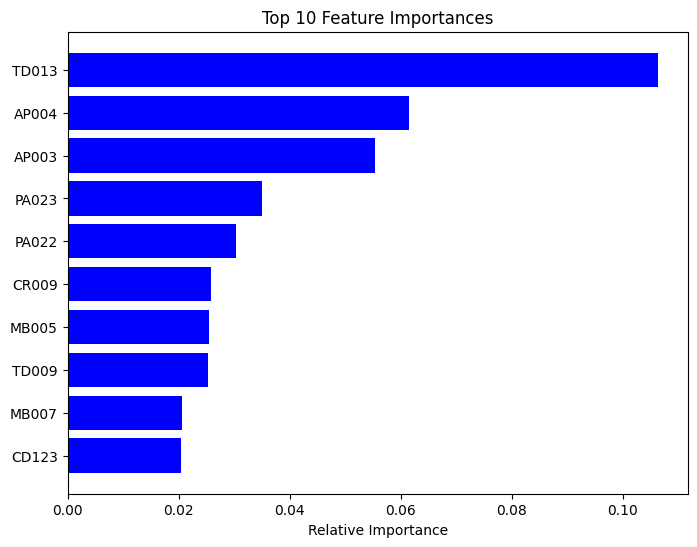

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from the trained Random Forest model
importances = rf_model_regressor.feature_importances_

# Get feature names
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[-10:]  # Indices of top 10 features
top_features = feature_names[indices]   # Names of top 10 features

# Plot top 10 feature importances
plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), top_features)
plt.xlabel("Relative Importance")
plt.show()


In [16]:
# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)

# Select only the top 10 features
X_train_top10 = X_train_scaled_df[top_features]
X_test_top10 = X_test_scaled_df[top_features]

# Train the Random Forest Regressor on the top 10 features
rf_model_top10 = RandomForestRegressor(random_state=42, n_estimators=10)
rf_model_top10.fit(X_train_top10, y_train)

# Predict and evaluate the model
y_pred_top10 = rf_model_top10.predict(X_test_top10)

# Calculate and display the Mean Squared Error (MSE)
mse_top10 = mean_squared_error(y_test, y_pred_top10)
print(f"Mean Squared Error for Top 10 Features: {mse_top10}")



Mean Squared Error for Top 10 Features: 0.16928137291449075


### Model Performance: Random Forest Regressor (Top 10 Features)

The model trained on the top 10 features achieved a **Mean Squared Error (MSE)** of **0.1693**. When compared to the MSE of **0.1469** from the full dataset, the performance shows a slight decline, which is expected due to the reduction in feature set.


#### Key Observations:
1. **Trade-off**:
   - Using only the top 10 features simplifies the model but slightly increases the prediction error.

2. **Efficiency**:
   - The model with fewer features is computationally less intensive and still performs reasonably well.

3. **Feature Importance**:
   - The selected top 10 features capture most of the predictive power while excluding less impactful variables.

This demonstrates the effectiveness of feature selection in balancing complexity and performance.


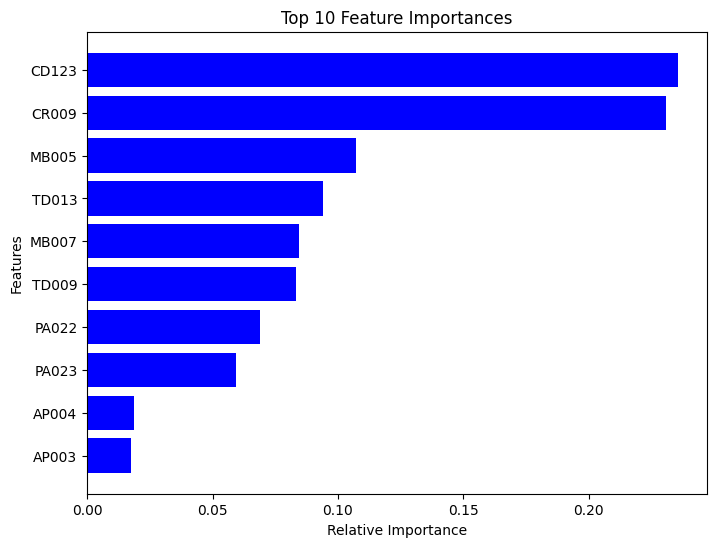

In [17]:
# Extract feature importances from the trained Random Forest Regressor model
importances = rf_model_top10.feature_importances_

# Get the feature names (from the top 10 features)
feature_names = X_train_top10.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]  # Indices sorted in descending order of importance
sorted_features = feature_names[indices]

# Plot the top 10 feature importances
plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(sorted_features, importances[indices], color="b", align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


Interestingly, the order of the feature importances have almost flipped in `rf_model_top10` compared to the original `rf_model_regressor`

## Understanding SHAP:

SHAP is a popular framework for interpreting machine learning models. It provides insights into how individual features contribute to the model's predictions, both globally (for the entire dataset) and locally (for individual predictions). 

#### **Why Use SHAP?**
1. **Global Interpretability**: 
   - SHAP explains the overall impact of each feature on the model’s predictions.
   - It helps identify which features are most important and how they influence the outcome.
   
2. **Local Interpretability**:
   - SHAP explains the specific contribution of features for individual predictions.
   - This is useful for understanding why the model made a particular prediction for a given observation.

3. **Fairness and Transparency**:
   - SHAP is based on game theory (Shapley values), ensuring each feature's contribution is fairly allocated.

#### **Key SHAP Visualizations:**
1. **Summary Plot**:
   - Provides a global view of feature importance and their impact on predictions.
2. **Dependence Plot**:
   - Shows how a specific feature impacts the model's predictions, including interactions with other features.
3. **Force Plot**:
   - Explains individual predictions by showing how each feature contributes to the outcome.

By applying SHAP to our Random Forest model, we aim to better understand how the top 10 features influence loan default predictions, both at the global level and for individual cases.


In [18]:
# Subset 8000 rows from the training data (stratified by the target variable)
X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train_top10, y_train, 
    train_size=8000, 
    stratify=y_train, 
    random_state=42
)

# Confirm the shape of the subset
print("Subset shape (X_train):", X_train_subset.shape)
print("Subset shape (y_train):", y_train_subset.shape)


Subset shape (X_train): (8000, 10)
Subset shape (y_train): (8000,)


In [19]:
import shap

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(rf_model_top10, feature_perturbation="tree_path_dependent")

# Compute SHAP values for the subset
shap_values = explainer.shap_values(X_train_subset)

# Confirm the shape of SHAP values
print("SHAP values shape:", np.array(shap_values).shape)


SHAP values shape: (8000, 10)


### Absolute SHAP Values Bar Plot

This plot visualizes the absolute mean SHAP values for each feature, providing a clear indication of the overall importance of each variable in influencing the model's predictions.

- **SHAP Value (Absolute)**: Represents the average magnitude of each feature's contribution, regardless of direction (positive or negative).
- **Color-Coded Significance**: Features with a positive correlation to the target variable are displayed in red, while those with a negative correlation are in blue.
- **Purpose**: This plot allows us to rank features by their overall impact on the model's predictions, highlighting the most critical variables driving outcomes.



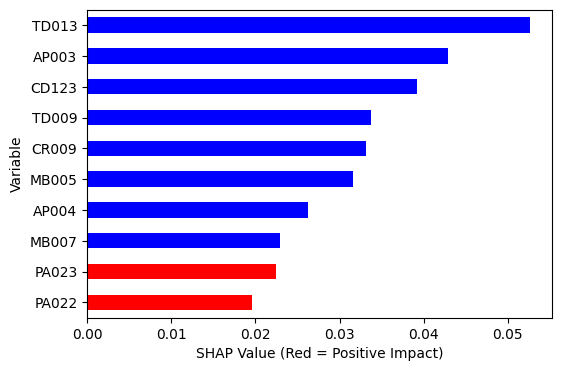

In [37]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(6,4),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train_subset) 

### Takeaways from the Absolute SHAP Values Bar Plot

1. **Top Contributors**:
   - **TD013** and **AP003** are the most influential features, with the highest absolute SHAP values, indicating their consistent importance in predictions.
   - **CD123**, **TD009**, and **CR009** also have significant contributions, playing key roles in shaping the model's outputs.

2. **Positive vs. Negative Impact**:
   - Features such as **PA023** and **PA022** show positive correlations with the target variable (default likelihood), as indicated by their red bars.
   - On the other hand, features like **TD013** and **CR009** primarily contribute negatively, reducing the probability of default.

3. **Feature Diversity**:
   - The model relies on a mix of features, with varying strengths and directional impacts, reflecting the complex nature of the loan default prediction task.

4. **Key Observations**:
   - The prominence of features like **TD013** and **AP003** aligns with their importance observed in other plots, reinforcing their pivotal role in model predictions.
   - The balanced mix of positive and negative impacts highlights the nuanced relationship between features and the target variable.

This plot effectively summarizes the global importance of features while providing insights into their directional contributions.


### SHAP Summary Plot (Beeswax Plot)

This plot shows the global importance of each feature in the model. The features are ranked based on their average absolute SHAP values, which represent the magnitude of their contribution to the model's predictions. 

- **Interpretation**: The higher a feature's SHAP value, the more it contributes to predictions. Features at the top (e.g., `CD123`, `CR009`) have the most significant impact, positively or negatively.
- **Usage**: Use this plot to identify which variables are most influential in determining loan default likelihood.


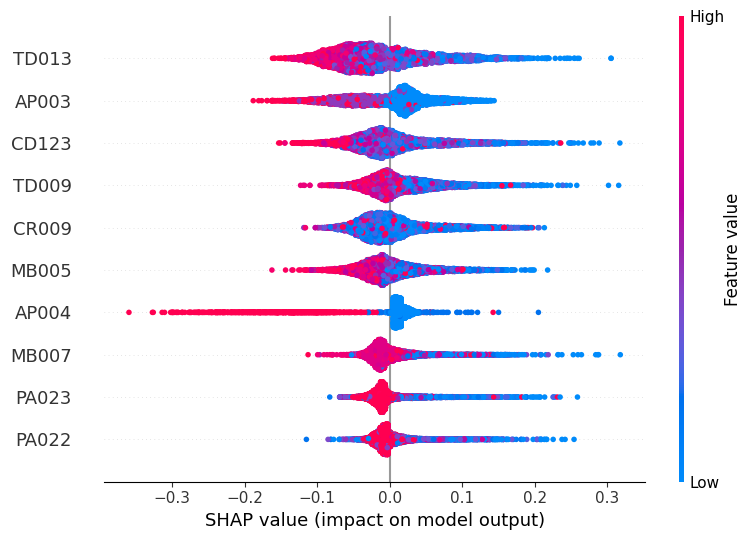

In [20]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_subset)


The SHAP summary plot visualizes the global importance of features in predicting `loan_default`. Features are ranked by their average absolute SHAP value, with the most impactful features at the top. Each point represents an observation's SHAP value, with its color corresponding to the feature value (red = high, blue = low).

#### Key Insights:
1. **Feature Importance**:
   - **TD013** stands out as the most influential feature, consistently contributing to predictions. Its high SHAP values suggest a strong relationship with default risk.
   - **AP003** and **CD123** show varying contributions depending on the observation, indicating potential thresholds or tipping points in their impact.
   
2. **Patterns in Interaction**:
   - Features like **TD009** and **CR009** demonstrate mixed impacts. This could mean their influence depends heavily on interactions with other variables or specific conditions within the dataset.
   - Some features (e.g., **AP004**) have a clearer separation between high and low values, highlighting their predictable role in driving predictions.

3. **Behavior of SHAP Values**:
   - Positive SHAP values (right side) increase the likelihood of loan default, while negative values (left side) decrease it.
   - The density of points along the x-axis suggests that certain features like **TD013** and **AP003** consistently push predictions in one direction, while others exhibit more balanced impacts.

#### Implications:
This plot not only ranks features by their importance but also provides a glimpse into how these features behave within the model. For instance, higher values of critical features like **TD013** and **CR009** generally increase the probability of `loan_default`. This suggests these features could represent high-risk behaviors or conditions.

Understanding these patterns can help identify actionable insights, such as focusing on mitigating risks associated with the most influential features or exploring potential interactions for better model interpretation.


### SHAP Dependence Plot for `CD123`

This plot shows the relationship between the feature `CD123` and its SHAP values, indicating how changes in this feature affect the model's prediction.

- **Interpretation**: The x-axis represents the values of `CD123`, and the y-axis represents its SHAP value. Positive SHAP values push predictions toward loan default (`1`), while negative SHAP values push predictions away from loan default (`0`).
- **Interaction**: The color gradient shows the interaction effect of another feature (`CR009`) on the relationship.
- **Usage**: This plot helps identify thresholds or patterns in `CD123` that increase or decrease the likelihood of default.


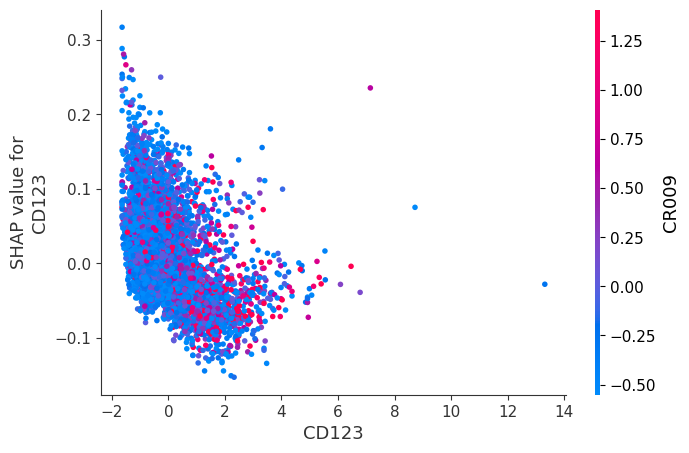

In [34]:
# SHAP Dependence Plot for the most important feature
shap.dependence_plot('CD123', shap_values, X_train_subset, interaction_index='CR009')


The dependence plot shows the relationship between the feature `CD123` and its SHAP values, reflecting how changes in `CD123` influence the model’s prediction for `loan_default`. The color gradient represents the interaction effect of the feature `CR009`.

#### Key Takeaways:
1. **Direct Influence of `CD123`**:
   - Higher values of `CD123` are associated with an increased likelihood of loan default, as seen from the positive SHAP values. This suggests that `CD123` is a strong predictor of default risk when its values are elevated.
   - For lower values of `CD123`, the SHAP values are near zero, indicating minimal influence on the model’s prediction.

2. **Interaction with `CR009`**:
   - Observations with high values of `CR009` (red) amplify the impact of `CD123`, contributing more significantly to positive SHAP values and increasing default probability.
   - In contrast, low values of `CR009` (blue) dampen the effect of `CD123`, moderating its influence on the predictions.

3. **Thresholds and Patterns**:
   - A clear threshold behavior is observed: the impact of `CD123` becomes significant at higher values, particularly when combined with high values of `CR009`.
   - This suggests a combined effect of these features that could signify specific risk profiles in the dataset.

#### Interpretation:
This plot highlights the combined influence of `CD123` and its interaction with `CR009` on the likelihood of loan default. Understanding these relationships helps identify the conditions under which `CD123` is a critical driver of predictions, providing actionable insights for risk mitigation strategies.


### SHAP Force Plots for 4 Observations

These plots provide local interpretations of the model's predictions for 4 individual observations, offering insights into how specific features influence the predictions.

- **Base Value**: The base value (far left) represents the average prediction of the model before feature contributions are considered.
- **Feature Contributions**: Features either push the prediction higher (positive impact in red) or lower (negative impact in blue). The size of the arrows reflects the magnitude of their influence.
- **Final Prediction**: The model’s final prediction is the sum of the base value and all feature contributions for a given observation.
- **Comparison Across Observations**: Examining force plots for multiple observations helps identify patterns in feature contributions, highlighting differences in how the model behaves for various cases.
- **Usage**: These plots are valuable for explaining specific predictions, debugging model outputs, and understanding the driving factors behind predictions for individual cases.


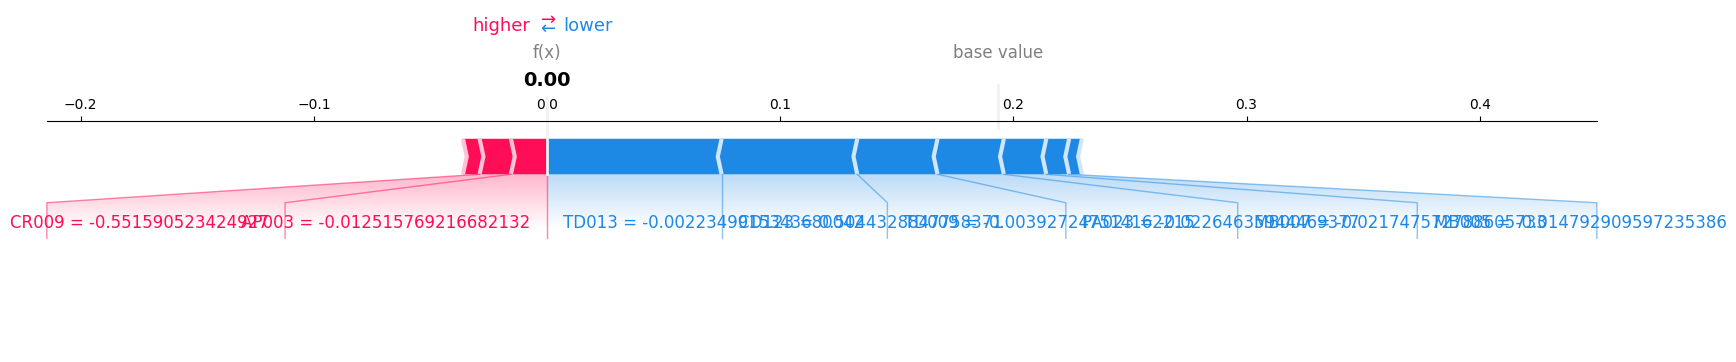

None

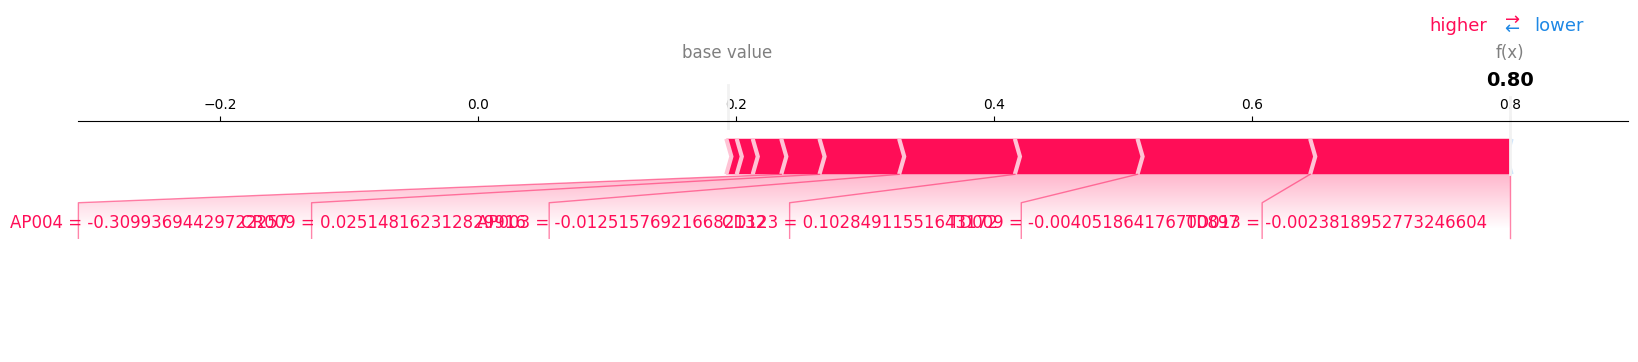

None

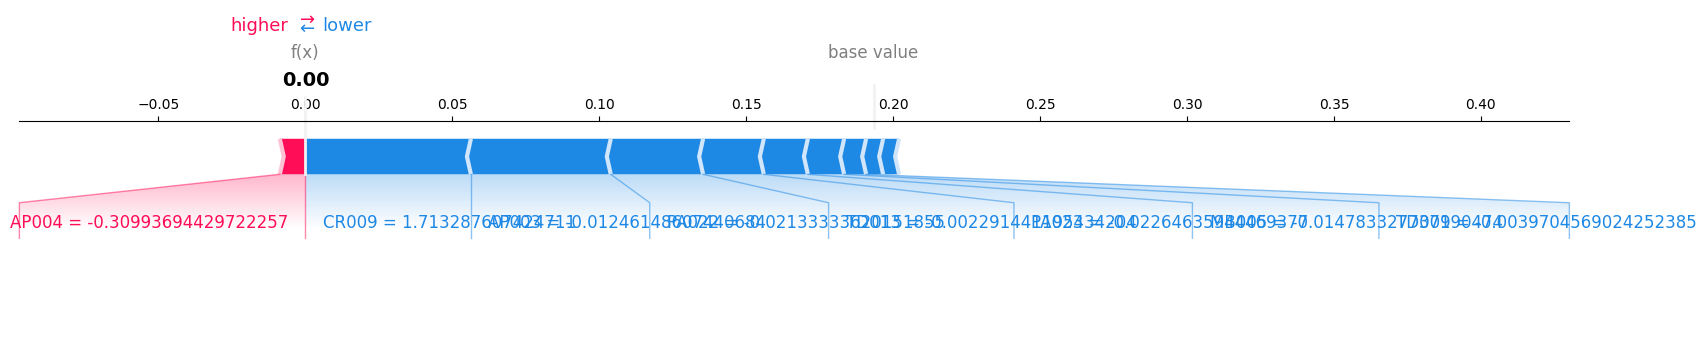

None

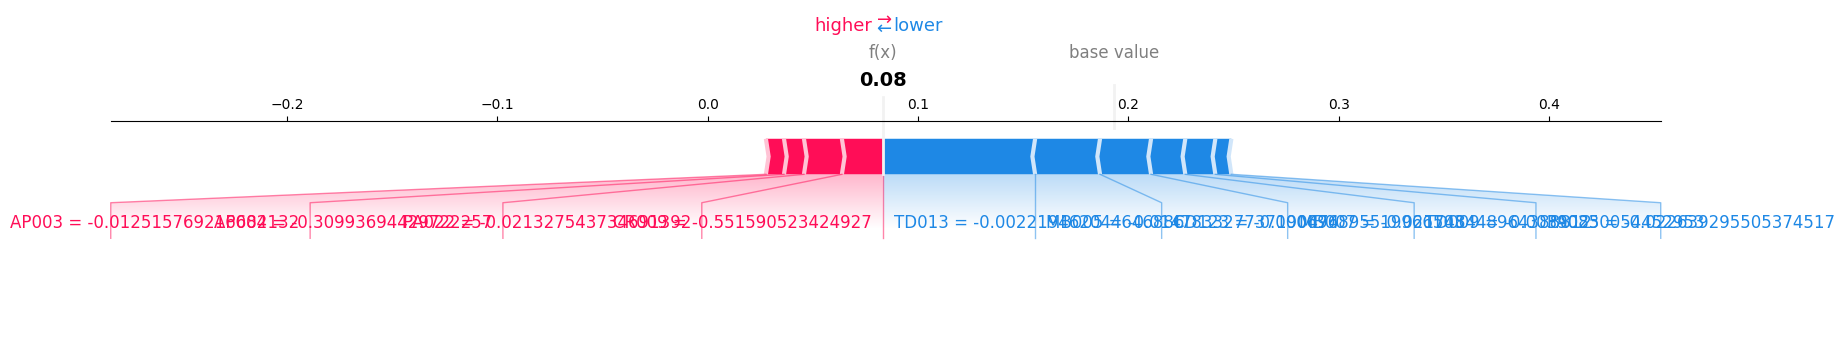

None

In [35]:
# Initialize SHAP JavaScript visualization
shap.initjs()

# Select 4 specific observations for analysis (e.g., rows 0, 1, 2, 3)
observations = [0, 1, 2, 3]

# Generate force plots for each observation
for i in observations:
    display(
        shap.force_plot(
            explainer.expected_value,  # Base value from the explainer
            shap_values[i],           # SHAP values for the specific observation
            X_train_subset.iloc[i],   # Feature values for the observation
            matplotlib=True           # Use Matplotlib rendering
        )
    )



#### Observation 1:
- **CR009** has the largest negative contribution, significantly lowering the prediction for loan default.
- **TD013** contributes positively but minimally compared to CR009.
- The final prediction is close to 0, heavily influenced by CR009’s strong impact in reducing default likelihood.

#### Observation 2:
- **AP004** is the dominant feature, contributing positively and pushing the prediction toward loan default.
- Other features, such as **CD123**, have slight positive contributions, while no major negative contributions counteract AP004.
- The final prediction is strongly influenced by AP004, leading to a high predicted likelihood of default.

#### Observation 3:
- **CR009** has an unusually high positive impact, making it the primary driver of the prediction.
- **AP004** provides a moderate negative contribution, slightly offsetting CR009’s effect.
- The prediction remains balanced, resulting in a neutral or low default likelihood due to competing influences.

#### Observation 4:
- **AP003** is the key feature contributing negatively to the prediction, lowering the likelihood of default.
- **TD013** and other minor features contribute positively but are insufficient to counteract AP003’s negative impact.
- The final prediction is moderately low, highlighting AP003’s significant role in reducing risk.


### Insights:
1. **Feature Dominance**: 
   - Certain features like **CR009**, **AP004**, and **AP003** have strong influences on predictions depending on the observation. Their contributions either dominate or balance out the effects of other features.
   
2. **Contrasting Roles**:
   - **CR009** shows both positive and negative effects across different observations, indicating its dual role based on interaction with other features.
   - **AP004** consistently pushes the prediction toward higher default likelihood when significant.

3. **Prediction Sensitivity**:
   - Observations show that the model’s predictions are highly sensitive to a few key features, while others contribute minimally, reflecting the importance of feature selection and interaction effects.

4. **Risk Profiles**:
   - The force plots effectively illustrate how individual risk profiles are determined by a mix of positive and negative contributions, highlighting the interpretability of the model for personalized decisions.


## Conclusion

This assignment provided a comprehensive analysis of the factors influencing loan default predictions using a Random Forest model and SHAP interpretability techniques. By systematically identifying the top 10 variables and generating SHAP plots, we gained critical insights into both global and local feature importance.

- **Key Findings**: Features such as **TD013**, **AP003**, and **CR009** consistently emerged as the most impactful variables, with clear patterns of influence on default predictions. Positive and negative contributions highlighted nuanced relationships between features and the likelihood of default.

- **SHAP Interpretations**: The SHAP Summary, Dependence, and Force plots allowed us to break down feature-level contributions, providing a transparent view of how predictions were derived. These visualizations offer actionable insights into individual risk profiles and global feature trends.

- **Model Transparency**: By applying SHAP, we addressed the interpretability challenges often associated with machine learning models, ensuring the results are understandable and actionable for stakeholders.

Overall, this assignment demonstrated the importance of feature selection, model evaluation, and interpretability in predictive modeling, laying a strong foundation for leveraging data-driven insights in decision-making processes.
